# 1.Web Scrapping with Pandas.

### 1. HTML

We'll use pandas library to perform web scraping. Pandas can take a link of a website like wikipedia and read HTML tables and convert it into a `DataFrame`and display. 

The function `read_html` returns a list of tabels. 

In [ ]:
# importing dependencies 
import pandas as pd 

# link and scraping the website. 
link = "https://en.wikipedia.org/wiki/List_of_Family_Guy_episodes"
tables = pd.read_html(link)

# printing 2nd table 
tables[1].head(5)

### 2. CSV 

Similar to the html we can read csv from website using a link to the csv file and call the function. This is less web scrapping and more of usually  loading csv file but from a link source rather than local. 

the website we used is - https://www.football-data.co.uk/data.php

In [ ]:
link = "https://www.football-data.co.uk/mmz4281/2324/E0.csv"

data = pd.read_csv(link)
data.head(5)

Similarly we can also extract tables from PDFs via extra dependencies in python. 
We have to install library called `camelot` along with `ghostscript` and `tk`. 

`import camelot`

`tabels = camelot.read_pdf("filename.pdf", pages = 1)`

Here we can have 2 methods , lattice and stream (use whichever works)

`tabels.export("filename.csv", f="csv", compress = True)`

Here f represent format , now lets conver to csv 

`tables[0].to_csv("filename.csv")` 

# Web Scraping Basics

Webscraping a website from it's HTML (hypertext markup language) content. This form the meaning and structure of any website. knowing basic web language will help us locate the data we want to scrape better and easily. 

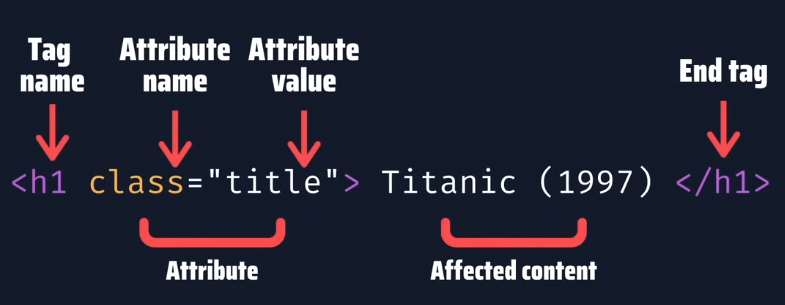

The above sample is called a tag , there are lot's of tags in HTML syntax and the one shown is a headder tag. 
This tag element has :
1. Tag Name associated and the Eng tag denoting closure. 
2. Attribute name represents the class of tag it belong to here it is refering to "title" meaning it is the title of the webpage or the content. 
3. Affected content which is the content itself. 


### Tags

1. `<head>` - head tag represents the head section and mostly contain metadata.
2. `<body>` - body tag establishes the body of a html document. 
3. `<header>` - different from head tag , hedder tag is associated with the introductory part of a body.
4. `<article>` - This is new to HTML5 this contain block entires , posts etc.
5. `<p>` - paragraph tag contain the content of website. 
6. `<h1>, <h2>, <h3>` - these tags are levels of heading in the website.
7. `<buttons>` - for butotns 
8. `<table>`- for making tabels.
9. `<td>` - table data 
10. `<tr>`- table row element 
11. `<ul> or <li>` - unordered list or ordered list
12. `<iframe>` - make it possible to embedded one frame over other. 
13. `<div>` - which is a divider or a generic container 
14. `<a>` - anchor tg used for hyperlinks `<a href="http://example.com"> Text </a>`

### HTML Stree structure 

To  understand a webpage we need to look at HTML tree structure. Let's take up an example of a website. 

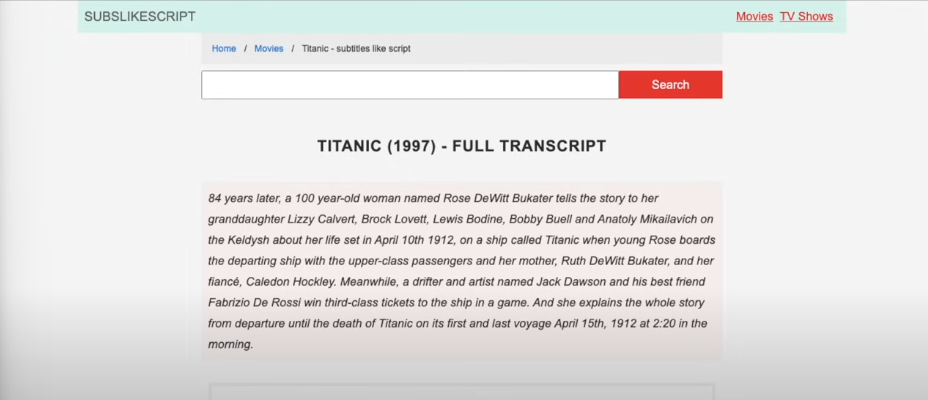

For this website a short and simplified code is give below. 

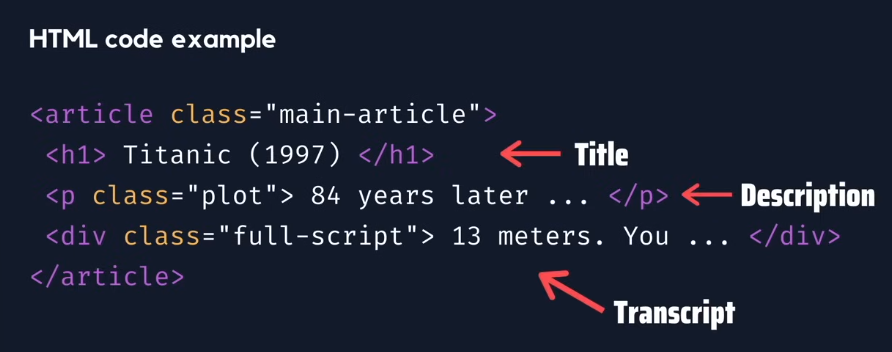

To understand the code better it is always to understand the tree structure as given below. Here root is always kinda like parent element. The attributes determine the appraoch taken to scrape this website. 

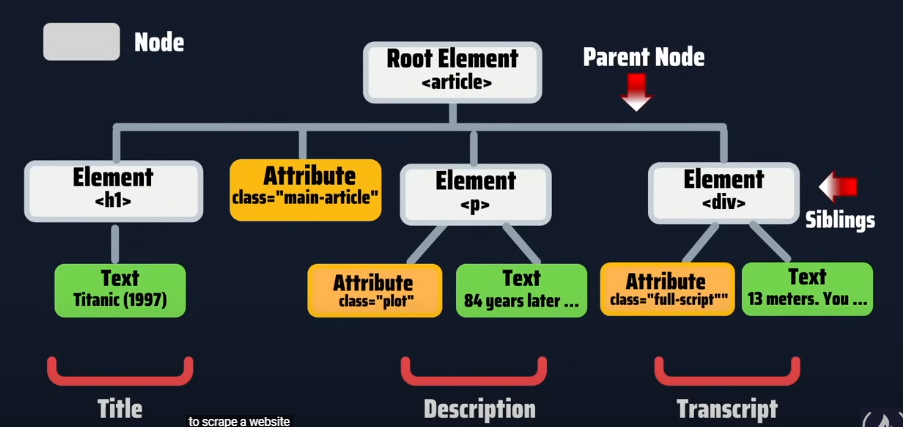


### XPath 

Stands for XML path Language, it is a querry language used to select nodes from a XML file or doc but it can also be used to select from HTML pages. 
Another way to select elements from webpages are the CSS Selectors these both have similar syntax. 


In XPath we use the `//tagName` to select element or a node from a webpage. If we wanna select an `<h1>` tag then we use `//<h1>`. This `//` is a special character in XPath it tells to pick all the elemets matching the pattern in the entire tree. 



Let's say there are many `<h1>` tags so we specify the index like `//<h1>[1]`.


We can also add attribute by the following syntax. An average XPath syntax looks like this for attributes. 

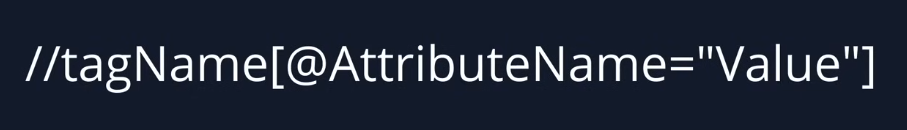

XPath has 2 main functions 
- contains()
- starts-with()

We can also use logical operators like AND OR in the XPath. 

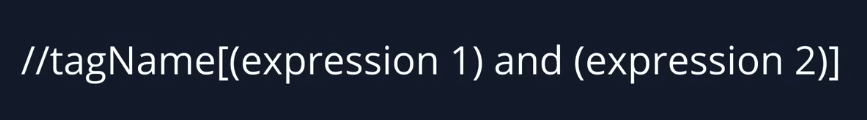






In [ ]:
<article class = "mian-article">
<h1>Titanic(1997) </hl>
<p class = "plot" > 84 years later...</p>
<p class ="plot2" > In the end ... </p>
    <div class = "full-script">
    "13 meters. You should see it. "
    "Okay, take her up and over the bow rail. "
    </div>
</article>

## CODE ## 

1. //p[1]
2. //div[@class="full-script"]/text()
3. //p[(@class = "plot1") or (@class="plot2")]
4. //p[contains(@class, "plot1")]
5. //div[contains(@class, "full-script")]

## OUTPUT

1. <p class = "plot" > 84 years later...</p>
2. "13 meters. You should see it. "
"Okay, take her up and over the bow rail. "


### Select Characters 

- `/`: select **the childern** from the node set on the left side of this character.
- `//`: Specifies that the matching note set should be located **at any level** within the document.

Example.


If i use `//article/p` , I get all the paragraphs matching , but i want lets say get text element `//article/text()` I won't get the text bfor that we need to get the element containig the text first then get text.


`//article/h1/text()`

- `.` : (dot) specifies the current context should be use (refers to present node)
- `..` : (double dot) Refers to a parent node. 

Example 

//h1. and //h1..

- `*` : a wildcard character select all the nodes follows (like in sql).

Example.


//article/*

- `@ `: Select an attribute
- `()` : grouping an XPath expression
- `[n]` : indicates the node with index "n" should be selected.



# Selenium webdriver

In [1]:
import selenium
print(selenium.__version__)

4.17.2


### Webdriver Setup 

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import pandas as pd

website = "https://www.thesun.co.uk/sport/football/"

# Path to the chromerdriver 
path = r"C:\\Users\\kaila\\Downloads\\chromedriver.exe"

C:\Users\kaila\AppData\Local\Temp\ipykernel_23024\1295718984.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# we define a service as of in selenium 4
service = Service(executable_path=path)

# Creating the driver 
driver = webdriver.Chrome(service=service)
driver.get(website)

### Automate The News!!!

Here is an snippet from the tutorial where the guy tries out XPath on the news website and use it in the code. We'll use the same. 


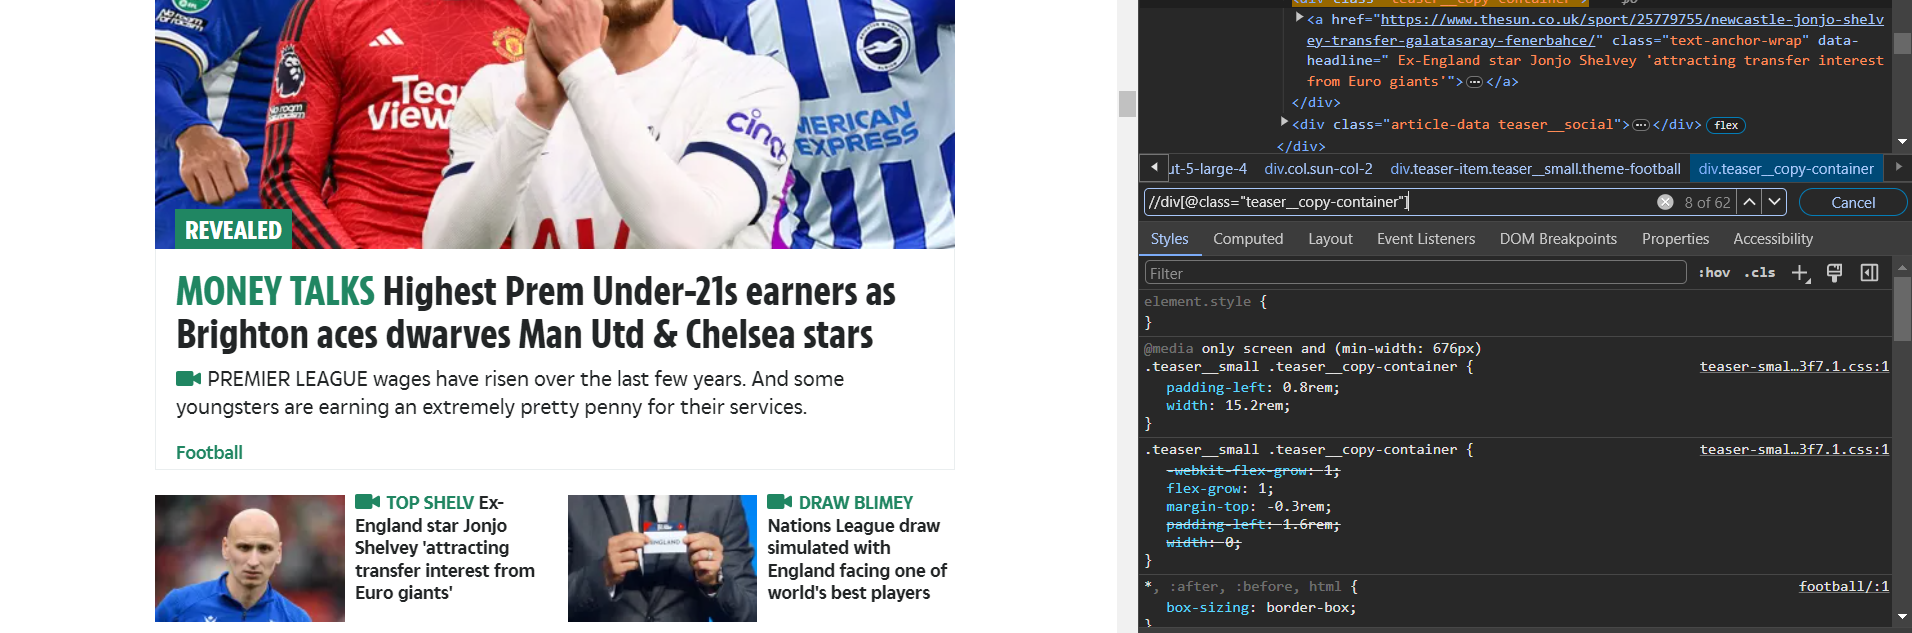


we want to open the div and move to next element for that we add `/`
single slash for that , like if we wanna move to head or anchor tag in the xpath above we write it as 

`//div[@class="teaser__copy-container]/a/h1`

In [5]:
website = "https://www.thesun.co.uk/sport/football/"

# Path to the chromerdriver 
path = r"C:\\Users\\kaila\\Downloads\\chromedriver.exe"

# we define a service as of in selenium 4
service = Service(executable_path=path)

# Creating the driver 
driver = webdriver.Chrome(service=service)
driver.get(website)

driver.implicitly_wait(20)  # explicit wait n seconds

containers = driver.find_elements(by = "xpath", value='//div[@class="teaser__copy-container"]')

titles = []
subtitles = [] 
links = []

for container in containers:

    title = container.find_element(by= "xpath", value='./a/h2').text
    
    # we can use . as the path is already given before in containers.
    subtitle = container.find_element(by="xpath", value='./a/p').text
    
    # we can use .text() to get the text element. 
    link = container.find_element(by= "xpath", value='./a').get_attribute("href")

    # append to list to export it as DataFrame. 
    titles.append(title)
    subtitles.append(subtitle)
    links.append(link)

my_dict = {"titles":titles,
           "subtitles":subtitles,
           "links": links}

df_headlines = pd.DataFrame(my_dict)

driver.quit()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"./a/h2"}
  (Session info: chrome=121.0.6167.161); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6B8275E42+3538674]
	(No symbol) [0x00007FF6B7E94C02]
	(No symbol) [0x00007FF6B7D45AEB]
	(No symbol) [0x00007FF6B7D8BF4E]
	(No symbol) [0x00007FF6B7D8C0CC]
	(No symbol) [0x00007FF6B7D812EC]
	(No symbol) [0x00007FF6B7DAF0EF]
	(No symbol) [0x00007FF6B7D8124A]
	(No symbol) [0x00007FF6B7DAF2C0]
	(No symbol) [0x00007FF6B7DCBDE3]
	(No symbol) [0x00007FF6B7DAEE53]
	(No symbol) [0x00007FF6B7D7F514]
	(No symbol) [0x00007FF6B7D80631]
	GetHandleVerifier [0x00007FF6B82A6CAD+3738973]
	GetHandleVerifier [0x00007FF6B82FC506+4089270]
	GetHandleVerifier [0x00007FF6B82F4823+4057299]
	GetHandleVerifier [0x00007FF6B7FC5C49+720121]
	(No symbol) [0x00007FF6B7EA126F]
	(No symbol) [0x00007FF6B7E9C304]
	(No symbol) [0x00007FF6B7E9C432]
	(No symbol) [0x00007FF6B7E8BD04]
	BaseThreadInitThunk [0x00007FFCD3EB257D+29]
	RtlUserThreadStart [0x00007FFCD4FEAA58+40]


In [6]:
df_headlines.head(5)

NameError: name 'df_headlines' is not defined


If we want to run the driver in **headless** mode to make the scraping happening in background mode

In [ ]:
# Headless mode 
from selenium.webdriver.chrome.options import Options

options = Options()
options.headless = True

# options parameter is used to give options to the webdriver 
# The webdriver always runs on default if options not given. 

service = Service(executable_path=path)
driver = webdriver.Chrome(service=service, options=options)
driver.get(website)

### Trail on medium 

In [7]:
# Headless mode 
from selenium.webdriver.chrome.options import Options

website = "https://medium.com/"

# Path to the chromerdriver 
path = r"C:\\Users\\kaila\\Downloads\\chromedriver.exe"

options = Options()
options.headless = True

# we define a service as of in selenium 4
service = Service(executable_path=path)

# Creating the driver 
driver = webdriver.Chrome(service=service, options=options)
driver.get(website)

driver.implicitly_wait(20)  # explicit wait n seconds

containers = driver.find_elements(by = "xpath", value='//h2[@class="by ka lb lc ld le lf lg lh li lj lk ll lm ln lo lp lq lr ls lt lu cy jt ju kc jw jy cb"]')



In [8]:
for container in containers:
    print(container.text)

# Get full HTML and parse (medium)

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
website = "https://medium.com/"

# Send an HTTP GET request to the website
response = requests.get(website)

# Parse the HTML code using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [18]:
medium = " "

for  i in soup.find_all("a")[7:25]:
    print(i.get_text())
    medium += i.get_text() 
    medium += "      "


Dare Obasanjo
5 Things I Learned About Leadership from the Death & Rebirth of Microsoft

Craig Labenz
Flutter
Extreme UI Adaptability in Flutter — How Google Earth supports every use case on earth

Mariya Mansurova
Towards Data Science
Data Visualisation 101: Playbook for Attention-Grabbing Visuals

Markus Stoll
ITNEXT
Visualize  your RAG Data — EDA for Retrieval-Augmented Generation

Daniel de Mello
UX Collective
Key takeaways from Airbnb’s winter redesign


In [19]:
medium

' Dare Obasanjo      5 Things I Learned About Leadership from the Death & Rebirth of Microsoft            Craig Labenz      Flutter      Extreme UI Adaptability in Flutter\u200a—\u200aHow Google Earth supports every use case on earth            Mariya Mansurova      Towards Data Science      Data Visualisation 101: Playbook for Attention-Grabbing Visuals            Markus Stoll      ITNEXT      Visualize  your RAG Data\u200a—\u200aEDA for Retrieval-Augmented Generation            Daniel de Mello      UX Collective      Key takeaways from Airbnb’s winter redesign      '